In [2]:
#cargar JSON
import json
with open('costos_finales.json') as file:
    costos = json.load(file)
with open('columnas_finales_87.json') as file:
    horarios = json.load(file)
with open('equipos_por_columna.json') as file:
    equipos = json.load(file)


In [9]:
import pandas as pd
# Convertir los diccionarios en dataframes
df_costos = pd.DataFrame(list(costos.items()), columns=['Horario', 'Costo'])
df_horarios = pd.DataFrame(list(horarios.items()), columns=['Horario', 'Franja Horaria'])
df_equipos = pd.DataFrame(list(equipos.items()), columns=['Horario', 'Equipos'])

# Hacer merge entre df_costos y df_horarios primero
df_merged = pd.merge(df_costos, df_equipos, on='Horario')




In [11]:
import pandas as pd

# Supongamos que 'horarios' es el diccionario que contiene los horarios que deseas convertir.
# Cada horario tiene 84 valores (7 días x 12 franjas horarias).

dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
franjas = ['00am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', 
           '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

# Lista para almacenar todas las filas del dataframe
data = []

# Recorrer los horarios
for horario_id, horario_data in horarios.items():
    # Para cada horario, recorrer cada día y franja horaria
    for i, dia in enumerate(dias):
        for j, franja in enumerate(franjas):
            index = i * 12 + j  # Obtener el índice correspondiente en la lista de 84 posiciones
            data.append({
                'Horario': horario_id,
                'Día': dia,
                'Franja Horaria': franja,
                'Estado': horario_data[index]  # Obtener el valor correspondiente en la lista
            })

# Crear el dataframe a partir de los datos recopilados
df_horarios_long = pd.DataFrame(data)




     Horario      Día Franja Horaria  Estado
0       h_87    Lunes       00am-2am     0.0
1       h_87    Lunes        2am-4am     0.0
2       h_87    Lunes        4am-6am     0.0
3       h_87    Lunes        6am-8am     1.0
4       h_87    Lunes       8am-10am     1.0
...      ...      ...            ...     ...
6379   h_162  Domingo        2pm-4pm     0.0
6380   h_162  Domingo        4pm-6pm     1.0
6381   h_162  Domingo        6pm-8pm     0.0
6382   h_162  Domingo       8pm-10pm     1.0
6383   h_162  Domingo      10pm-12am     0.0

[6384 rows x 4 columns]


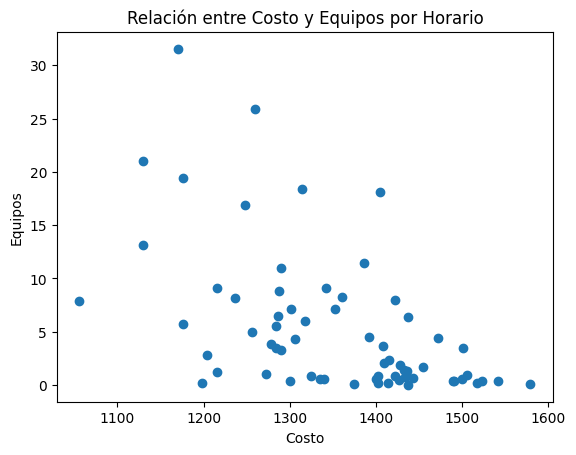

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['Costo'], df_merged['Equipos'])
plt.title('Relación entre Costo y Equipos por Horario')
plt.xlabel('Costo')
plt.ylabel('Equipos')
plt.show()


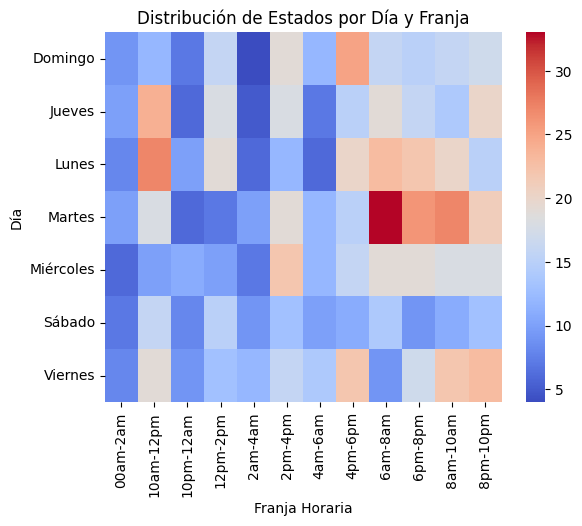

In [15]:
import seaborn as sns

df_estado_dia = df_horarios_long.groupby(['Día', 'Franja Horaria'])['Estado'].sum().unstack()
sns.heatmap(df_estado_dia, cmap='coolwarm')
plt.title('Distribución de Estados por Día y Franja')
plt.show()


In [16]:
top_costos = df_merged.sort_values(by='Costo', ascending=False).head(10)
print("Top 10 horarios más costosos:")
print(top_costos)

bottom_costos = df_merged.sort_values(by='Costo', ascending=True).head(10)
print("Top 10 horarios menos costosos:")
print(bottom_costos)


Top 10 horarios más costosos:
   Horario   Costo   Equipos
48   h_146  1579.0  0.113637
59   h_157  1541.0  0.356511
56   h_154  1523.0  0.371659
61   h_159  1517.0  0.199247
53   h_151  1505.0  0.980043
50   h_148  1501.0  3.454151
58   h_156  1500.0  0.572417
62   h_160  1490.0  0.428078
28   h_124  1489.0  0.365198
40   h_137  1472.0  4.405635
Top 10 horarios menos costosos:
   Horario   Costo    Equipos
0     h_87  1056.0   7.843993
2     h_90  1130.0  13.162665
3     h_91  1130.0  20.984996
6     h_94  1170.0  31.525386
10   h_100  1176.0  19.457060
8     h_96  1176.0   5.696149
14   h_105  1198.0   0.196546
12   h_102  1204.0   2.838917
1     h_88  1216.0   1.238552
16   h_108  1216.0   9.109165


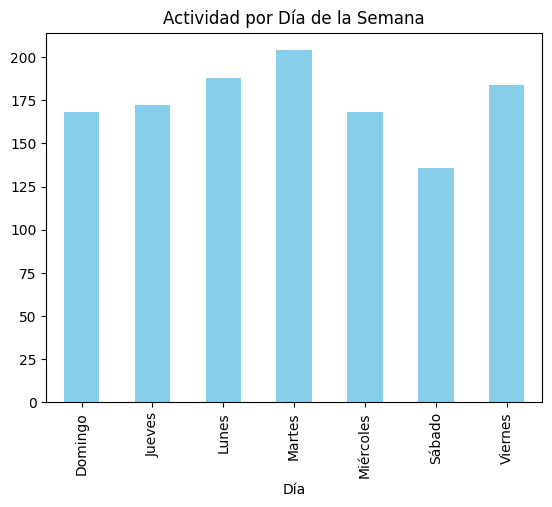

In [17]:
df_actividad_dia = df_horarios_long.groupby('Día')['Estado'].sum()
df_actividad_dia.plot(kind='bar', title='Actividad por Día de la Semana', color='skyblue')
plt.show()


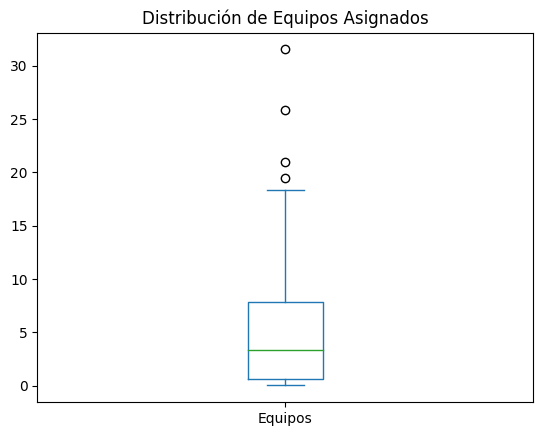

In [18]:
df_merged['Equipos'].plot(kind='box', title='Distribución de Equipos Asignados')
plt.show()


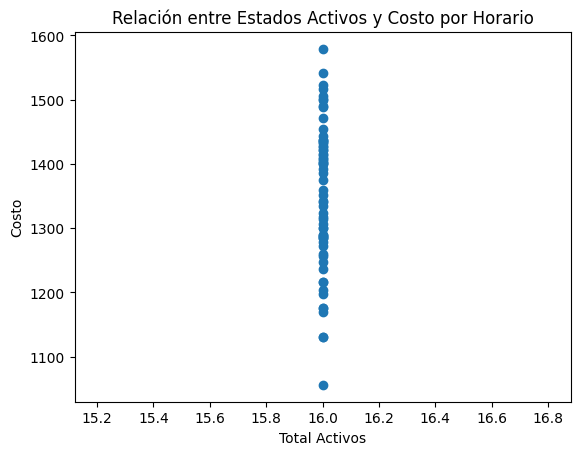

In [20]:
df_total_activos = df_horarios_long.groupby('Horario')['Estado'].sum().reset_index()
df_merged = pd.merge(df_merged, df_total_activos, on='Horario', how='left')
df_merged.rename(columns={'Estado': 'Total Activos'}, inplace=True)

plt.scatter(df_merged['Total Activos'], df_merged['Costo'])
plt.title('Relación entre Estados Activos y Costo por Horario')
plt.xlabel('Total Activos')
plt.ylabel('Costo')
plt.show()


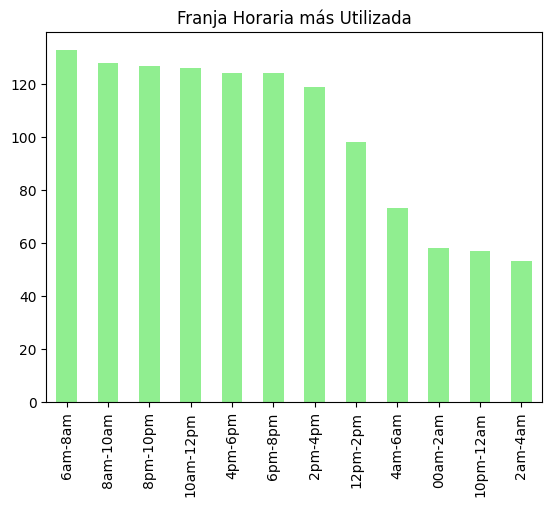

In [21]:
df_franjas_activas = df_horarios_long[df_horarios_long['Estado'] == 1.0]['Franja Horaria'].value_counts()
df_franjas_activas.plot(kind='bar', title='Franja Horaria más Utilizada', color='lightgreen')
plt.show()


In [25]:
# Agrupar por día y franja horaria
equipos_por_dia_franja = df_horarios_long.groupby(['Día', 'Franja Horaria'])['Estado'].sum()

# Mostrar resultados
print(equipos_por_dia_franja)


Día      Franja Horaria
Domingo  00am-2am           9.0
         10am-12pm         12.0
         10pm-12am          7.0
         12pm-2pm          16.0
         2am-4am            4.0
                           ... 
Viernes  4pm-6pm           22.0
         6am-8am            9.0
         6pm-8pm           17.0
         8am-10am          22.0
         8pm-10pm          23.0
Name: Estado, Length: 84, dtype: float64


In [26]:
# Calcular la correlación entre el costo y el número de equipos
correlacion = df_merged[['Costo', 'Equipos']].corr()

# Mostrar la correlación
print(correlacion)


            Costo   Equipos
Costo    1.000000 -0.534378
Equipos -0.534378  1.000000


In [27]:
# Filtrar los horarios donde el estado es 1 (indica que está activo en esa franja)
horarios_sobrecargados = df_horarios_long[df_horarios_long['Estado'] == 1]

# Contar cuántas franjas están activas por día
sobrecarga_por_dia = horarios_sobrecargados.groupby('Día').size()

print(sobrecarga_por_dia)


Día
Domingo      168
Jueves       172
Lunes        188
Martes       204
Miércoles    168
Sábado       136
Viernes      184
dtype: int64


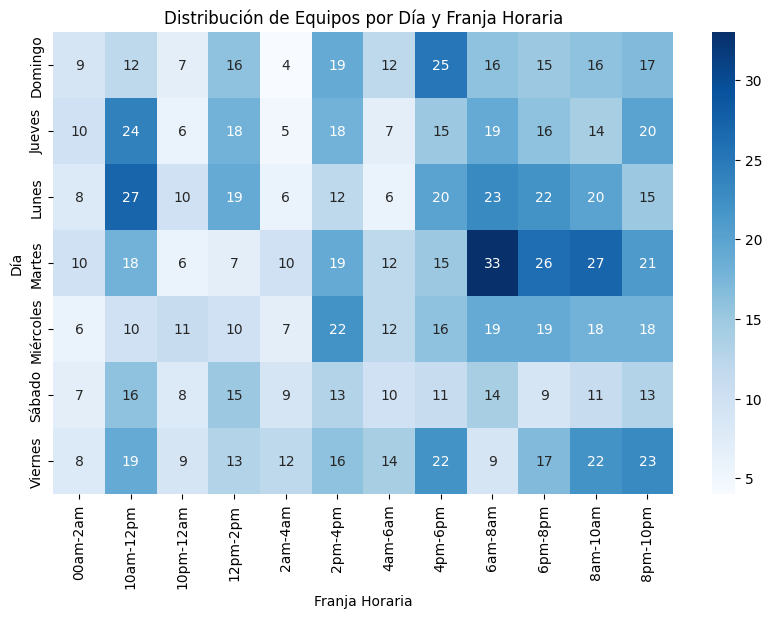

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla pivotante para los equipos asignados por día y franja
pivot_equipos = df_horarios_long.pivot_table(index='Día', columns='Franja Horaria', values='Estado', aggfunc='sum')

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_equipos, cmap="Blues", annot=True)
plt.title("Distribución de Equipos por Día y Franja Horaria")
plt.show()


In [30]:
# Ordenar los horarios por costo y número de equipos
horarios_optimos = df_merged.sort_values(by=['Costo', 'Equipos'], ascending=[True, False])

# Mostrar los horarios óptimos
print(horarios_optimos.head(10))  # Los 10 horarios más óptimos


   Horario   Costo    Equipos  Total Activos
0     h_87  1056.0   7.843993           16.0
3     h_91  1130.0  20.984996           16.0
2     h_90  1130.0  13.162665           16.0
6     h_94  1170.0  31.525386           16.0
10   h_100  1176.0  19.457060           16.0
8     h_96  1176.0   5.696149           16.0
14   h_105  1198.0   0.196546           16.0
12   h_102  1204.0   2.838917           16.0
16   h_108  1216.0   9.109165           16.0
1     h_88  1216.0   1.238552           16.0
